# Marketing Analytics Homework 1 - Lili Kostanyan

# Comparison of the Ember Baby Bottle System Plus and Traditional Baby Bottles

### Innovation from the list - Ember Baby Bottle System Plus

### Similar innovation from the past - Traditional baby feeding bottles

The **Ember Baby Bottle System Plus** can be compared to traditional baby feeding bottles, which have evolved significantly since the first glass nursing bottle was patented by **C. M. Windship in 1841** in the United States. Early bottles, typically holding 8 to 16 ounces, were basic and lacked the advanced materials or features seen in today’s bottles. **Elijah Pratt patented the first rubber nipple in 1845**, but these early versions had strong odors and degraded easily in hot water. Parents often used cloths over the bottle ends to compensate. The challenges of artificial feeding at the time, including high infant mortality, pushed scientists to develop nutritional formulas, leading to the creation of modern infant formula substitutes.

Traditionally, parents heated bottles by immersing them in hot water or using electric warmers. The **Ember Baby Bottle System Plus** builds on this by integrating an app-controlled, portable warming system that maintains the bottle’s temperature for hours. This eliminates the need for immersion in hot water and provides a safer, more convenient option for feeding.

By combining the historic function of baby bottles with modern technology, the Ember system offers a much-needed improvement in convenience for today’s parents.

In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!cp /content/drive/MyDrive/statistic_id761262_infant_feeding_bottle_market_size_in_china_2013.xlsx /content/


In [ ]:
# Set the file path (adjust this to match your file location in Drive)
file_path = 'statistic_id761262_infant_feeding_bottle_market_size_in_china_2013.xlsx'

data = pd.read_excel(file_path, sheet_name=1, skiprows=5, usecols="B:C", header=None)

data.columns = ['Year', 'Market Size (Billion Yuan)']

# Display the data
data


,Year,Market Size (Billion Yuan)
0,2013,2.20
1,2014,2.70
2,2015,3.30
3,2016,4.10
4,2017,4.92
5,2018,5.63
6,2019,6.13
7,2020,6.41
8,2021,6.58
9,2022,6.65


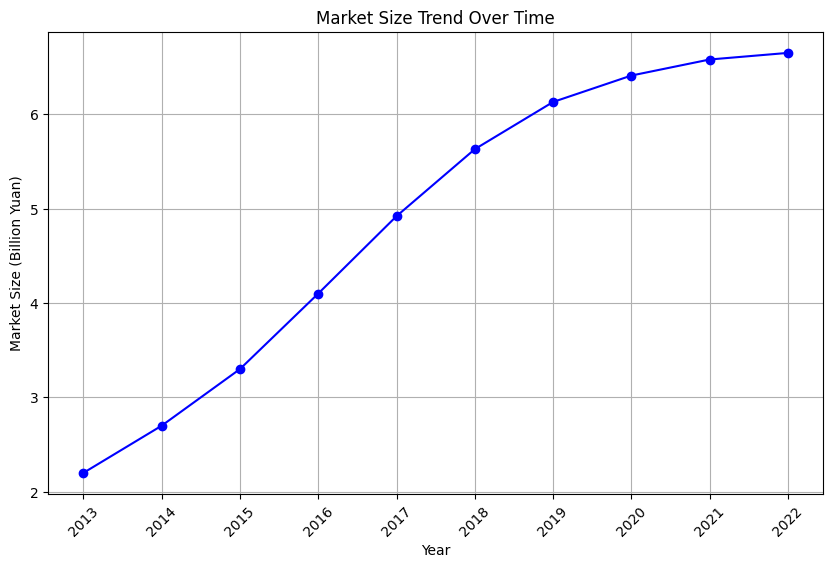

In [ ]:
# @title Market Size Trend Over Time

plt.figure(figsize=(10, 6))
plt.grid(True)
plt.plot(data['Year'], data['Market Size (Billion Yuan)'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.xticks(data['Year'], rotation=45)
plt.ylabel('Market Size (Billion Yuan)')
_ = plt.title('Market Size Trend Over Time')


## This statistic displays the market size of the baby feeding bottle market in China from 2013 to 2022. In 2022, the Chinese infant feeding bottle market size amounted to 6.65 billion yuan, increasing from 6.58 billion yuan in the previous year (2021). "One yuan equals approximately 0.15 U.S. dollars and 0.143 euros (as of April 2023).

The price of the Ember Baby Bottle System Plus is approximately 1,866.60 yuan.

## In our case, since it is annual market size data, we first need to convert it into cumulative form before applying the Bass model. This conversion is essential because the Bass model is based on the idea of tracking cumulative adoption over time.

In [ ]:
# Calculate cumulative market size
data['Cumulative Market Size (Billion Yuan)'] = data['Market Size (Billion Yuan)'].cumsum()

# Display the cumulative market size
print(data)


   Year  Market Size (Billion Yuan)  Cumulative Market Size (Billion Yuan)
0  2013                        2.20                                   2.20
1  2014                        2.70                                   4.90
2  2015                        3.30                                   8.20
3  2016                        4.10                                  12.30
4  2017                        4.92                                  17.22
5  2018                        5.63                                  22.85
6  2019                        6.13                                  28.98
7  2020                        6.41                                  35.39
8  2021                        6.58                                  41.97
9  2022                        6.65                                  48.62


The cumulative market size for each year is simply the sum of all previous years' market sizes. This gives you the total adoption (or total market size) up to each year.

For example:

Cumulative Market Size (2014) = Market Size
(2013) + Market Size (2014) = 2.20 + 2.70 = 4.90 billion yuan

# Estimate Bass Model Parameters

In [ ]:
# Define the Bass model function
def bass_model(t, p, q, M):
    adoption = M * ((p + q)**2 / p) * np.exp(-(p + q) * t) / ((1 + (q / p) * np.exp(-(p + q) * t))**2)
    return adoption

# Time series data (e.g., Year) and cumulative market size data
t = np.array(data['Year'] - data['Year'].min())  # Time periods
cum_sales = np.array(data['Cumulative Market Size (Billion Yuan)'])  # Cumulative adoption data

# Estimate p, q, M using curve_fit
popt, pcov = curve_fit(bass_model, t, cum_sales, maxfev=10000)

# Extract parameters
p, q, M = popt
print(f'Estimated p: {p}, q: {q}, M: {M}')


Estimated p: 0.007991557331552258, q: 0.37418609613551096, M: 511.5739619282996


<ipython-input-7-ac0a403e5c8f>:3: RuntimeWarning: overflow encountered in exp
  adoption = M * ((p + q)**2 / p) * np.exp(-(p + q) * t) / ((1 + (q / p) * np.exp(-(p + q) * t))**2)
<ipython-input-7-ac0a403e5c8f>:3: RuntimeWarning: overflow encountered in square
  adoption = M * ((p + q)**2 / p) * np.exp(-(p + q) * t) / ((1 + (q / p) * np.exp(-(p + q) * t))**2)
<ipython-input-7-ac0a403e5c8f>:3: RuntimeWarning: invalid value encountered in divide
  adoption = M * ((p + q)**2 / p) * np.exp(-(p + q) * t) / ((1 + (q / p) * np.exp(-(p + q) * t))**2)


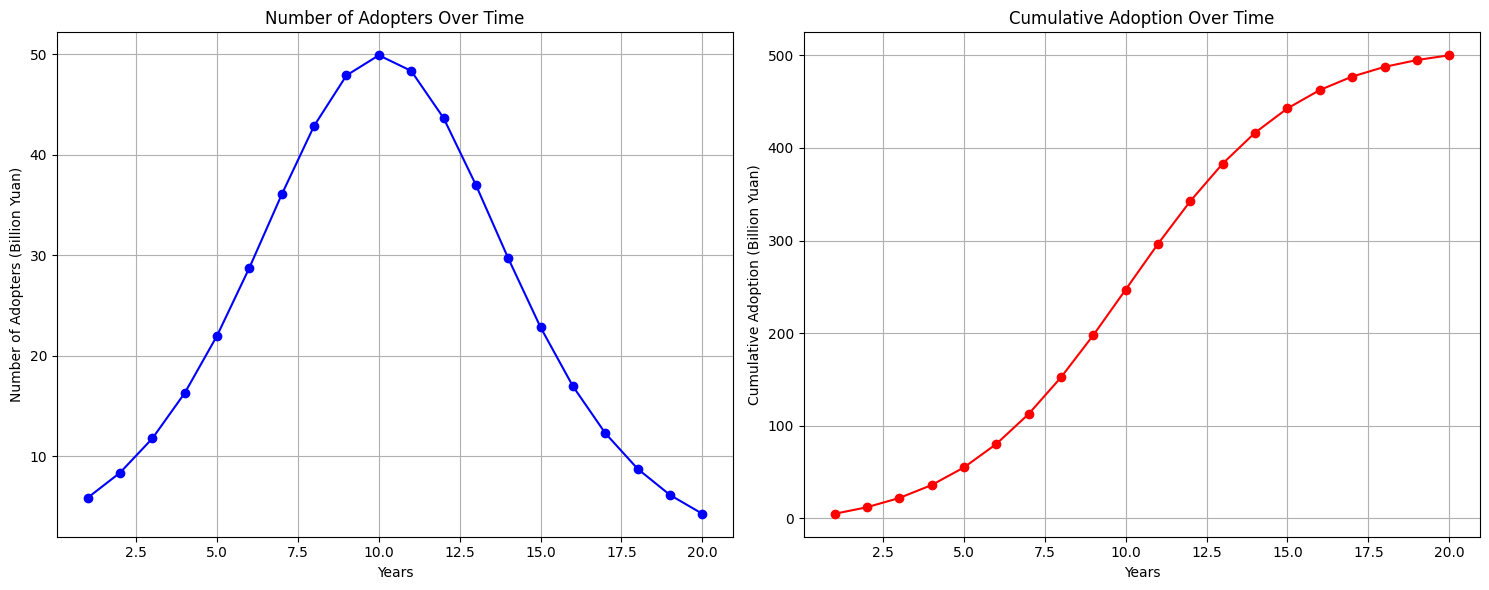

In [ ]:
# Bass model functions for number of adoptions (f(t)) and cumulative adoptions (F(t))
def bass_f(t, p, q):
    return ((p + q)**2 / p) * np.exp(-(p + q) * t) / (1 + (q / p) * np.exp(-(p + q) * t))**2

def bass_F(t, p, q):
    return (1 - np.exp(-(p + q) * t)) / (1 + (q / p) * np.exp(-(p + q) * t))

# Parameters from the Bass Model
p = 0.00799
q = 0.37419
M = 511.57  # Market potential in billion yuan

# Time period (e.g., next 20 years)
t = np.arange(1, 21, 1)

# Predict the number of adopters per year
pred_adopters = bass_f(t, p, q) * M

# Predict cumulative adoption over time
pred_cumulative = bass_F(t, p, q) * M

# Plot the results
plt.figure(figsize=(15, 6))

# Plot number of adopters
plt.subplot(1, 2, 1)
plt.plot(t, pred_adopters, marker='o', color='b')
plt.title('Number of Adopters Over Time')
plt.xlabel('Years')
plt.ylabel('Number of Adopters (Billion Yuan)')
plt.grid(True)

# Plot cumulative adoption
plt.subplot(1, 2, 2)
plt.plot(t, pred_cumulative, marker='o', color='r')
plt.title('Cumulative Adoption Over Time')
plt.xlabel('Years')
plt.ylabel('Cumulative Adoption (Billion Yuan)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Key Insights from the Plots:

**Number of Adopters Over Time:** It starts slow, peaks in the middle, and then declines as the market saturates. This peak indicates the period where the maximum number of new adopters join the market.

**Cumulative Adoption Over Time:** This plot shows how the total number of adopters (cumulative adoption) approaches the market potential, 511.57 billion yuan. The curve flattens out as market saturation is reached.


# Analyze the market for baby feeding bottles in China

## Based on our findings from Alibaba website, baby feeding bottles range between 13.33 yuan to 80.00 yuan. So, the average price of a baby feeding bottle in this range is approximately 46.67 yuan, it is reasonable to round this up to 50 yuan as a practical approximation.

From our data, the total market size in 2022 is 6.65 billion yuan. And we made an assumption that the average price is 50 yuan for standard baby bottles.

# Using the total market size and the average price of a baby bottle:


## Units Sold = 6,650,000,000 / 50 = 133,000,000 units

which is the total number of baby bottles sold in China in 2022.

As we know the Ember Baby Bottle System costs 1,866.60 yuan, which is significantly higher than the average price, assume 60% of the market can afford a product at this premium price

## Affordable Units = 133,000,000 × 0.60 = 79,800,000 units

In China, a significant portion of the population is part of the growing middle class, which has higher purchasing power than before. As of recent economic trends, it’s estimated that 60% of consumers could afford to buy higher-priced products, especially in the baby care market, where parents are willing to invest in premium products for perceived safety, quality, and convenience. The rise of a wealthier urban population and dual-income households also supports this estimate​. (https://wpic.co/blog/top-5-mother-baby-care-market-trends-in-china-2023/)

Of those who can afford the premium product, assume that 20% will actually purchase the product:

The assumption that 20% of those who can afford the premium product will actually purchase it is based on general consumer behavior in premium markets:


## Potential Market = 79,800,000 × 0.20 = 15,960,000 units

This means the potential market for a premium-priced baby feeding bottle like the Ember Baby Bottle System in China could be approximately 15.96 million units, based on price sensitivity and market penetration assumptions.

In [ ]:
# Calculate the number of new adopters for each year
new_adopters = np.diff(pred_cumulative, prepend=0)

# Print the number of new adopters each year
for year, adopters in zip(t, new_adopters):
    print(f"Year {year}: {adopters:.2f} billion yuan")


Year 1: 4.93 billion yuan
Year 2: 7.06 billion yuan
Year 3: 9.99 billion yuan
Year 4: 13.94 billion yuan
Year 5: 19.05 billion yuan
Year 6: 25.32 billion yuan
Year 7: 32.41 billion yuan
Year 8: 39.57 billion yuan
Year 9: 45.61 billion yuan
Year 10: 49.20 billion yuan
Year 11: 49.43 billion yuan
Year 12: 46.24 billion yuan
Year 13: 40.45 billion yuan
Year 14: 33.36 billion yuan
Year 15: 26.20 billion yuan
Year 16: 19.80 billion yuan
Year 17: 14.54 billion yuan
Year 18: 10.44 billion yuan
Year 19: 7.39 billion yuan
Year 20: 5.17 billion yuan


**Peak Year:** Adoption peaks around Year 10, reaching 49.20 billion yuan. This is the period where the most significant number of new adopters join the market.

**Decline After Year 11:** After Year 11, the number of new adopters starts to decline, which is typical of markets as they approach saturation. This reflects the fact that most of the potential market has already adopted the product by that point.